In [32]:
import pandas as pd
print(f'Pandas version: {pd.__version__}')
import sklearn
print(f'sklearn version: {sklearn.__version__}')

import numpy as np

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

Pandas version: 2.2.2
sklearn version: 1.4.2


## Q1. Downloading the data
Download the data for January and February 2023.
Read the data for January. How many columns are there?


In [2]:
df_01 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_02 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
print(f'There are {len(df_01.columns)} columns')

There are 19 columns


## Q2. Computing duration 
Now let's compute the __duration__ variable. It should contain the duration of a ride in minutes.
What's the standard deviation of the trips duration in January?

In [3]:
df_01.columns
df_01['duration'] = df_01.tpep_dropoff_datetime - df_01.tpep_pickup_datetime
df_01['duration_sec'] = df_01['duration'].apply(lambda td: td.total_seconds())
df_01['duration_min'] = df_01['duration'].apply(lambda td: td.total_seconds() * 1. / 60)
print(f"Std is: {df_01['duration_min'].std():.2f}")

Std is: 42.59


## Q3. Dropping outliers
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).
What fraction of the records left after you dropped the outliers?

In [4]:
filtered_df = df_01[(df_01['duration_min'] >= 1) & (df_01['duration_min'] <= 60)]

# Calculate the fraction of records left after filtering
fraction_left = len(filtered_df) / len(df_01)
print(f"Filtered DataFrame is {fraction_left * 100:.2f}% of whole df")

Filtered DataFrame is 98.12% of whole df


## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix (number of columns)?

In [5]:
df_01.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration',
       'duration_sec', 'duration_min'],
      dtype='object')

In [20]:
# df = df_01.copy()
df = filtered_df.copy()
# df = df.drop(columns=['duration_sec', 'duration_min', 'duration'])
# df = df.drop(columns=['duration_sec', 'duration'])

categorical = ['PULocationID', 'DOLocationID']
# numerical = ['trip_distance']
df[categorical] = df[categorical].astype(str)

# train_dicts = df[categorical + numerical].to_dict(orient='records')
train_dicts = df[categorical].to_dict(orient='records')
# print("train_dicts", train_dicts)
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
# print("X_train", X_train)
X_train.shape

(3009173, 515)

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters
Calculate the RMSE of the model on the training data
What's the RMSE on train?

In [23]:
target = 'duration_min'
y_train = df[target].values
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

mse: 58.511208038349004, rmse: 7.649261927686161
rmse: 7.649261927686161


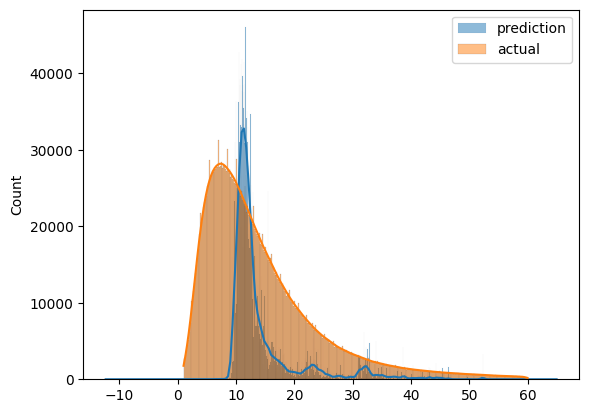

In [34]:
y_pred = lr.predict(X_train)

# sns.histplot(y_pred, label='prediction')
# sns.histplot(y_train, label='actual')
sns.histplot(y_pred, kde=True, label='prediction')
sns.histplot(y_train, kde=True, label='actual')
plt.legend()

# sns.distplot(y_pred, label='prediction')
# sns.distplot(y_train, label='actual')
# plt.legend()

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print(f'mse: {mse}, rmse: {rmse}')

# print(f'rmse: {mean_squared_error(y_train, y_pred, squared=False)}')
print(f'rmse: {root_mean_squared_error(y_train, y_pred)}')

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

mse: 60.51204087232082, rmse: 7.778948571132272
rmse: 7.778948571132272


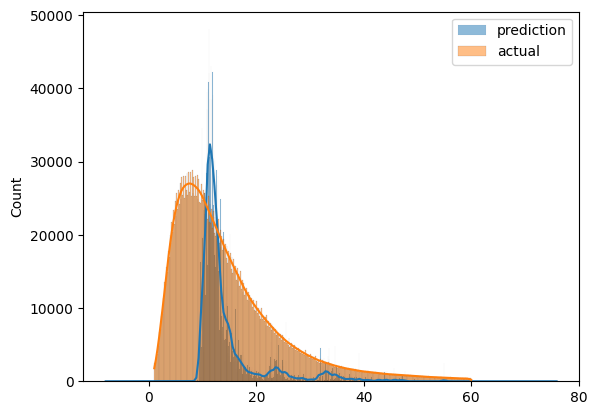

In [39]:
df_02['duration'] = df_02.tpep_dropoff_datetime - df_02.tpep_pickup_datetime
df_02['duration_sec'] = df_02['duration'].apply(lambda td: td.total_seconds())
df_02['duration_min'] = df_02['duration'].apply(lambda td: td.total_seconds() * 1. / 60)

filtered_df_2 = df_02[(df_02['duration_min'] >= 1) & (df_02['duration_min'] <= 60)]

df = filtered_df_2.copy()

categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)

train_dicts = df[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
# X_train.shape

target = 'duration_min'
y_train = df[target].values
# y_train

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

sns.histplot(y_pred, kde=True, label='prediction')
sns.histplot(y_train, kde=True, label='actual')
plt.legend()

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print(f'mse: {mse}, rmse: {rmse}')

# print(f'rmse: {mean_squared_error(y_train, y_pred, squared=False)}')
print(f'rmse: {root_mean_squared_error(y_train, y_pred)}')